
# 📘 [1일차 2교시] 2.1. 단순 선형 회귀: 세상의 현상을 직선으로 요약하기

## 1. 가장 단순한 형태의 예측: 선형성(Linearity)

### 1) 세상은 원인과 결과로 이루어져 있다
우리가 헬스케어 데이터를 분석하는 이유는 단 하나입니다. "무언가($x$)가 변할 때, 결과($y$)는 어떻게 변할까?"를 알고 싶기 때문입니다.

*   약물 투여량($x$)을 늘리면 $\rightarrow$ 혈압($y$)은 얼마나 떨어질까?
*   운동 시간($x$)을 늘리면 $\rightarrow$ 체지방($y$)은 얼마나 빠질까?
*   나이($x$)를 먹으면 $\rightarrow$ 암 발병률($y$)은 얼마나 올라갈까?

이 원인($x$)과 결과($y$)의 관계를 가장 심플하게 설명하는 도구가 바로 '직선(Line)'입니다.

### 2) 중학교 수학의 재해석: $y = ax + b$ 에서 $y = wx + b$ 로
학창 시절 함수 시간에 배웠던 일차 함수 공식을 기억하시나요?
$$ y = ax + b $$
여기서 $a$는 기울기, $b$는 $y$절편이었습니다. 머신러닝에서는 이 식을 아주 조금 다르게 씁니다.
$$ y = w x + b $$
알파벳만 $a$에서 $w$로 바뀌었지만, 그 안에 담긴 철학은 완전히 다릅니다. 이제부터 이 수식을 기계가 학습하는 관점에서 해부해 보겠습니다.

---

## 2. $w$ (Weight): 가중치, 영향력의 크기

머신러닝에서 $w$는 'Weight(가중치)'의 약자입니다. 수학적으로는 직선의 '기울기'이지만, 데이터 분석의 관점에서는 '영향력(Influence)' 또는 '민감도(Sensitivity)'를 의미합니다.

헬스케어 예시를 통해 $w$의 값이 변할 때 세상이 어떻게 달라지는지 상상해 봅시다.

### 상황: "운동 시간($x$)에 따른 체중 감소($y$) 예측" ($y = -wx + b$)

#### (1) $w$가 양수(+) vs 음수(-)일 때: 방향성
*   $w$가 양수(+): $x$가 커지면 $y$도 커집니다. (비례 관계)
    *   *예:* 섭취 칼로리($x$)와 체중($y$). 많이 먹으면 찐다.
*   $w$가 음수(-): $x$가 커지면 $y$는 작아집니다. (반비례 관계)
    *   *예:* 운동 시간($x$)과 체중($y$). 많이 움직이면 빠진다.
    *   머신러닝은 데이터의 패턴을 보고 스스로 +인지 -인지 방향을 결정합니다.

#### (2) $w$의 절댓값이 클 때 (급경사): "민감하다"
*   만약 $w = 100$이라면? 운동을 1시간만 해도 체중이 100g씩 쑥쑥 빠진다는 뜻입니다.
*   이것은 $x$의 작은 변화에도 $y$가 격렬하게 반응한다는 뜻입니다.
*   *의료적 해석:* "효능이 매우 강한 약"입니다. 조금만 투여해도 수치가 확 변합니다.

#### (3) $w$의 절댓값이 작을 때 (완만함): "둔감하다"
*   만약 $w = 0.1$이라면? 운동을 10시간 해야 겨우 1g 빠진다는 뜻입니다.
*   $x$가 아무리 변해도 $y$는 별로 신경 쓰지 않습니다.
*   *의료적 해석:* "효과가 미미한 영양제" 혹은 "내성이 생긴 상태"일 수 있습니다.

#### (4) $w = 0$ 일 때 (수평선): "상관없다"
*   기울기가 0이라는 것은 $x$가 100이든 1000이든 $y$는 항상 똑같다는 뜻입니다.
*   *예:* "오늘 입은 양말 색깔($x$)"과 "당뇨병 수치($y$)". 양말 색을 바꿔도 병은 낫지 않습니다.
*   머신러닝 모델이 학습 결과 특정 변수의 $w$를 0으로 만들었다면, 그것은 "이 변수는 쓸모없으니 무시하겠다"는 선언과 같습니다.

---

## 3. $b$ (Bias): 편향, 기본값

$b$는 'Bias(편향)'의 약자입니다. 수학적으로는 '$y$절편'이며, $x$가 0일 때 $y$가 가지는 '기본값(Baseline)'을 의미합니다.

### 왜 편향($b$)이 필요한가?
모든 자연 현상이 0에서 시작하지 않기 때문입니다.

#### 예시: 신생아의 성장 예측
*   $x$: 태어난 지 지난 날짜 (일)
*   $y$: 아기의 키 (cm)

만약 우리가 편향 없이 $y = wx$라는 식을 쓴다면 어떻게 될까요?
*   $x$에 0(태어난 날)을 넣으면 $y$도 무조건 0이 되어야 합니다.
*   하지만 태어날 때 키가 0cm인 아기는 없습니다. 보통 50cm 정도 되죠.
*   이 모델은 태어난 날의 키를 설명할 수 없어서 엉터리 예측을 하게 됩니다.

그래서 우리는 $+ b$를 추가해서 시작점을 올려줍니다.
*   $y = wx + 50$
*   이제 $x$가 0일 때, $y$는 50이 됩니다. 현실과 맞아떨어집니다.
*   여기서 $b=50$은 "아무것도 안 해도 기본적으로 깔고 들어가는 베이스"입니다.

---

## 4. 학습의 목표: '최적의 선'을 찾는다는 것

이제 우리는 $y = wx + b$라는 도구를 가졌습니다. 문제는 "도대체 $w$와 $b$에 어떤 숫자를 넣어야 정답인가?"입니다.

환자 100명의 데이터가 산점도(Scatter Plot) 위에 점으로 찍혀 있다고 상상해 보세요.
어떤 사람은 운동을 많이 했는데 살이 덜 빠졌고, 어떤 사람은 조금만 해도 많이 빠졌습니다. 점들이 들쑥날쑥 퍼져 있습니다.
우리는 이 점들의 한가운데를 가장 예쁘게 관통하는 하나의 직선을 긋고 싶습니다.

*   직선을 너무 위로 그으면? 다들 실제보다 뚱뚱하다고 예측할 겁니다.
*   직선을 너무 아래로 그으면? 다들 실제보다 날씬하다고 예측할 겁니다.
*   가장 좋은 직선은 "오차(Error)가 가장 적은 직선"입니다.

### 손실 함수 (Loss Function): 채점 기준표
우리가 그은 선이 '좋은 선'인지 '나쁜 선'인지 점수를 매기는 공식이 필요합니다. 이를 머신러닝에서는 '손실 함수(Loss Function)' 또는 '비용 함수(Cost Function)'라고 부릅니다. 회귀 분석에서 가장 많이 쓰는 채점표는 MSE (Mean Squared Error, 평균 제곱 오차)입니다.

#### MSE의 계산 과정 (직관적 이해)
1.  오차 측정: 내 직선이 예측한 값과, 실제 환자 데이터 사이의 차이를 잽니다.
    *   *환자 A:* 실제 70kg, 내 예측 72kg $\rightarrow$ 오차 -2
    *   *환자 B:* 실제 60kg, 내 예측 55kg $\rightarrow$ 오차 +5
2.  제곱(Square) 하기: 오차를 그냥 더하면 -2와 +2가 만나서 0이 되어버립니다. "오차가 없다"고 착각하게 되죠. 그래서 마이너스를 없애기 위해 제곱을 합니다.
    *   $(-2)^2 = 4$
    *   $(5)^2 = 25$
    *   *추가 효과:* 제곱을 하면 큰 오차(5)는 훨씬 더 큰 벌점(25)을 받게 됩니다. "크게 틀리는 것을 용납하지 않겠다"는 의지입니다. 의료 데이터에서 큰 실수는 위험하므로 이 방식이 매우 적합합니다.
3.  평균(Mean) 내기: 모든 환자에 대한 벌점(제곱 오차)을 더해서 평균을 냅니다.

결론: 머신러닝 모델이 "학습한다"는 것은, 수만 번의 시행착오를 거치며 이 MSE 점수(벌점)가 가장 작아지는 $w$와 $b$의 조합을 찾아내는 과정입니다.

---

## 5. 경사하강법 (Gradient Descent): 산에서 내려오는 방법

그렇다면 컴퓨터는 어떻게 그 '최적의 $w, b$'를 찾을까요? 무식하게 모든 숫자를 다 대입해볼까요? 아닙니다. 훨씬 스마트한 방법을 씁니다. 바로 경사하강법입니다.

### 눈을 가리고 산을 내려오는 등산객
여러분이 칠흑 같은 어둠 속에서 산꼭대기에 서 있다고 상상해 보세요. 목표는 가장 낮은 지점(오차가 0인 곳, 골짜기)으로 내려가는 것입니다. 앞이 보이지 않으므로 지도를 볼 수 없습니다. 이때 어떻게 내려갈까요?

1.  발끝 감각 활용: 발로 땅을 더듬어 봅니다. 어느 쪽이 내리막길인지 경사(기울기, Gradient)를 확인합니다.
2.  한 걸음 이동: 경사가 급한 쪽(내리막)으로 한 발짝 내딛습니다.
3.  반복: 다시 발로 경사를 확인하고, 또 한 발짝 내려갑니다.
4.  도착: 어느 방향으로 발을 뻗어도 더 이상 내려갈 곳이 없는 평평한 곳에 도달하면 멈춥니다. 그곳이 바로 최적의 지점입니다.

### 머신러닝의 학습 과정
1.  초기화: 처음에 컴퓨터는 아무 $w, b$나 랜덤으로 찍습니다. (산 위의 어딘가에 떨어짐)
2.  예측 및 오차 계산: 현재 $w, b$로 예측해보고 얼마나 틀렸는지(MSE) 계산합니다. (현재 고도 확인)
3.  미분(기울기 계산): 수학적으로 미분을 해서, $w$를 조금 키우는 게 오차를 줄이는지, 줄이는 게 나은지 방향을 판단합니다. (발끝으로 경사 확인)
4.  업데이트: 오차가 줄어드는 방향으로 $w$와 $b$를 아주 조금 수정합니다. (한 걸음 이동)
5.  반복: 이 과정을 오차가 더 이상 줄어들지 않을 때까지 수천 번 반복합니다.

---

## 6. 요약: 2교시의 핵심 메시지

1.  단순 선형 회귀: 세상의 복잡한 인과관계를 $y = wx + b$라는 직선 하나로 심플하게 요약하는 기술입니다.
2.  $w$ (가중치): 입력이 출력에 미치는 영향력의 크기입니다. (약의 효능, 위험 인자의 민감도)
3.  $b$ (편향): 입력이 없어도 존재하는 기본값입니다. (신생아의 몸무게, 기초 대사량)
4.  MSE (손실 함수): 모델이 얼마나 틀렸는지 채점하는 벌점표입니다. 오차를 제곱해서 평균 냅니다.
5.  학습: 벌점(MSE)을 최소화하기 위해 경사하강법을 써서 최적의 $w$와 $b$를 찾아내는 탐험입니다.

------------------------------------------------------------------------

# 📘 단순 선형 회귀 (Simple Linear Regression) 정리

## 2.1. \[개념 심화\] 세상의 현상을 직선으로 요약하기

### 1) 선형 회귀의 철학: $y = wx + b$

우리는 복잡한 세상의 데이터를 가장 단순한 형태인 ‘직선’으로
표현하고자 한다. 중학교 수학에서 배운 1차 함수 $y = ax + b$가
머신러닝에서는 $y = wx + b$로 표기된다.

- $x$ (입력, Feature): 우리가 알고 있는 정보 (예: 환자의 BMI).
- $y$ (출력, Target): 예측하고자 하는 값 (예: 당뇨 수치).
- $w$ (가중치, Weight): 입력 $x$가 출력 $y$에 미치는
  ‘영향력(기울기)’이다.
  - $w$가 양수(+)이면: BMI가 늘면 당뇨 수치도 는다.
  - $w$가 음수(-)이면: 운동량이 늘면 혈당은 준다.
  - $w$의 절댓값이 클수록: 아주 작은 변화에도 결과가 민감하게 반응한다.
- $b$ (편향, Bias): $x$가 0일 때의 ‘기본값(절편)’이다.
  - 운동을 전혀 안 해도(x=0) 기본적인 심박수는 0이 아니다. 이 기본
    베이스라인을 잡아주는 역할을 한다.

### 2) 학습의 목표: ‘최적의 선’ 찾기

데이터 포인트들이 산점도(Scatter plot)에 뿌려져 있을 때, 이 점들을 가장
잘 대변하는 직선 하나를 긋는 것이 목표이다. 그렇다면 무엇이 ‘가장 잘
대변하는’ 것일까?

### 3) 손실 함수 (Loss Function): 평균 제곱 오차 (MSE)

직선이 잘 그어졌는지 평가하려면 ‘오차(Error)’를 계산해야 한다. \*
오차: 실제 데이터 점과 우리가 그은 직선 사이의 수직 거리
($실제값 - 예측값$). \* MSE (Mean Squared Error): 오차를 그냥 더하면
플러스와 마이너스가 상쇄되어 0이 될 수 있다. 그래서 오차를
제곱(Square)하여 평균을 낸다. \* 결론: 머신러닝 모델이 학습한다는
것은 이 MSE 값(오차)을 최소화하는 $w$와 $b$ 숫자를 찾아내는
과정이다. 이를 위해 ’경사하강법(Gradient Descent)’이라는 수학적 최적화
기법이 사용된다.


## 2.2. \[예제 1\] 가중치(w)의 직관적 이해: 기울기가 바뀔 때

데이터가 주어졌을 때, 기울기($w$)가 변함에 따라 직선이 어떻게 변하고
오차가 어떻게 달라지는지 눈으로 확인한다.

상황: 하루 운동 시간(시간)에 따른 칼로리 소모량(kcal).

``` python
import numpy as np
import matplotlib.pyplot as plt

# 1. 실제 데이터 (Exercise Data)
# 운동 1시간 -> 300kcal, 2시간 -> 600kcal, 3시간 -> 900kcal
X = np.array([1, 2, 3])
y = np.array([300, 600, 900])

# 2. 가설 직선 그려보기
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', s=100, label='Actual Data')

# 경우 1: w = 200 (기울기가 너무 낮음)
y_pred_1 = 200 * X
plt.plot(X, y_pred_1, color='green', linestyle='--', label='w=200 (Underestimation)')

# 경우 2: w = 400 (기울기가 너무 높음)
y_pred_2 = 400 * X
plt.plot(X, y_pred_2, color='red', linestyle='--', label='w=400 (Overestimation)')

# 경우 3: w = 300 (최적의 기울기)
y_pred_3 = 300 * X
plt.plot(X, y_pred_3, color='blue', linewidth=3, label='w=300 (Best Fit)')

plt.xlabel('Exercise (Hours)')
plt.ylabel('Calories Burned (kcal)')
plt.title('Impact of Weight (w) on Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# 설명: 파란색 선이 데이터 점을 정확히 관통한다.
# 이때의 w(300)이 이 데이터가 가진 '규칙'이다.
```


> **📖 문제 풀이 가이드**
>
> 이 예제는 선형 회귀의 핵심 요소인 **가중치(Weight, $w$)**의 역할을 직관적으로 이해하는 것이 목표입니다.
> - **핵심 개념**: $y = wx$ 에서 $w$(기울기)가 변할 때 그래프가 어떻게 회전하는지 관찰합니다.
> - **시각화**: 데이터를 가장 잘 표현하는(오차가 가장 적은) $w$를 눈으로 찾아봅니다.
> - **사용 함수**:
>   - `plt.plot()`: 데이터를 점이나 선으로 시각화합니다.
>   - `np.linspace()`: 그래프를 그리기 위한 x축 데이터(연속된 숫자들)를 생성합니다.


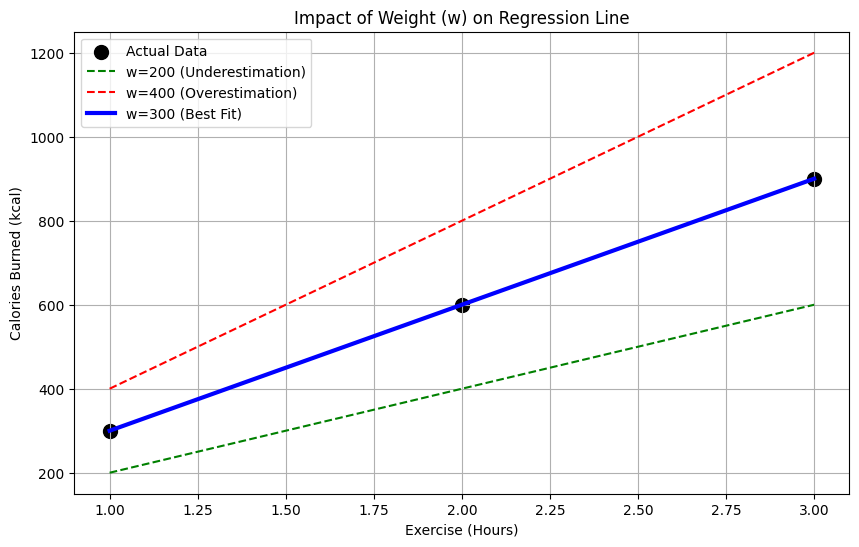

In [61]:
#do write code
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3])
y = np.array([300,600,900])

plt.figure(figsize=(10,6))
plt.scatter(x,y, color='black', s=100, label='Actual Data')

y_pred_1 = 200 * x
plt.plot(x, y_pred_1, color='green', linestyle='--', label='w=200 (Underestimation)')

y_pred_2 = 400 * x
plt.plot(x, y_pred_2, color='red', linestyle='--', label='w=400 (Overestimation)')

y_pred_3 = 300 * x
plt.plot(x, y_pred_3, color='blue', linewidth=3, label='w=300 (Best Fit)')

plt.xlabel('Exercise (Hours)')
plt.ylabel('Calories Burned (kcal)')
plt.title('Impact of Weight (w) on Regression Line')
plt.legend()
plt.grid(True)
plt.show()

## 2.3. \[예제 2\] 편향(b)의 필요성: 원점을 지나지 않는 데이터

모든 데이터가 0에서 시작하지 않는다. 편향($b$)이 없으면 모델이 데이터를
제대로 설명할 수 없음을 확인한다.

상황: 신생아부터 어린이까지의 나이(월)와 키(cm). 태어날 때(0개월)
키는 0cm가 아니다.

``` python
# 1. 데이터 준비
# 0개월: 50cm, 12개월: 75cm, 24개월: 85cm
X_age = np.array([0, 12, 24])
y_height = np.array([50, 75, 85])

plt.figure(figsize=(8, 5))
plt.scatter(X_age, y_height, color='black', label='Data')

# 2. 편향이 없는 모델 (y = wx)
# 원점(0,0)을 무조건 지나야 하므로 데이터를 따라가지 못한다.
w_no_bias = 1.5
plt.plot(X_age, w_no_bias * X_age, label='y = 1.5x (No Bias)', color='red', linestyle='--')

# 3. 편향이 있는 모델 (y = wx + b)
# b=50 으로 시작점을 올려주면 데이터를 잘 설명한다.
w_bias = 1.5
b = 50
plt.plot(X_age, w_bias * X_age + b, label='y = 1.5x + 50 (With Bias)', color='blue')

plt.title('Why Bias (b) is Essential')
plt.xlabel('Age (Months)')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

# 설명: 편향(b)은 데이터의 '기본 시작점(Baseline)'을 맞춰주는 역할을 한다.
```

> **📖 문제 풀이 가이드**
>
> 모든 현상이 원점(0, 0)에서 시작하지 않습니다. 이를 보정해주는 **편향(Bias, $b$)**의 중요성을 배웁니다.
> - **핵심 개념**: $y = wx + b$ 에서 $b$(절편)가 그래프를 위/아래로 이동시키는 역할을 이해합니다.
> - **상황**: 태어날 때(0개월) 키가 0cm가 아니므로, $b$가 50(cm) 근처가 되어야 데이터를 잘 설명할 수 있습니다.


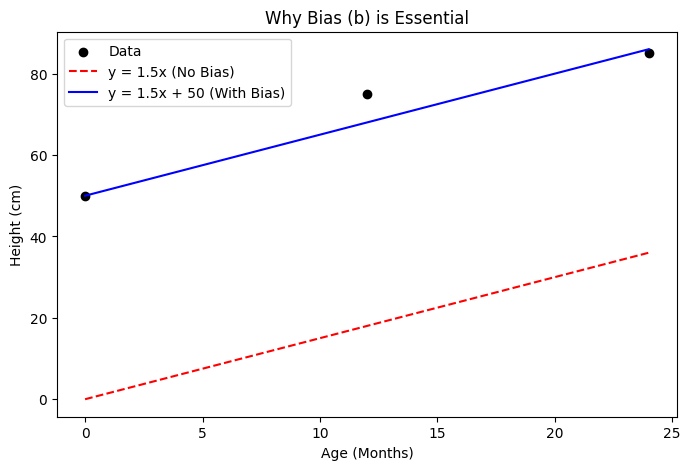

In [62]:
#do write code
x_age = np.array([0,12,24])
y_height = np.array([50,75,85])

plt.figure(figsize=(8,5))
plt.scatter(x_age, y_height, color='black', label='Data')

w_no_bias = 1.5
plt.plot(x_age, w_no_bias * x_age, label = 'y = 1.5x (No Bias)', color='red', linestyle='--')

w_bias = 1.5
b = 50
plt.plot(x_age, w_bias * x_age + b, label = 'y = 1.5x + 50 (With Bias)', color='blue')

plt.title('Why Bias (b) is Essential')
plt.xlabel('Age (Months)')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

## 2.4. \[예제 3\] Scikit-learn을 이용한 자동 학습

이제 수동으로 $w, b$를 찾는 것이 아니라, Scikit-learn 라이브러리가
자동으로 최적의 값을 찾게 한다.

상황: 수축기 혈압(SBP)과 이완기 혈압(DBP)의 관계.

``` python
from sklearn.linear_model import LinearRegression

# 1. 데이터 준비 (2차원 배열 필수)
# 수축기 혈압(X) -> 이완기 혈압(y) 예측
X_sbp = np.array([[110], [120], [130], [140], [150]])
y_dbp = np.array([70, 75, 80, 85, 95])

# 2. 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_sbp, y_dbp)

# 3. 결과 확인 (학습된 파라미터)
print(f"모델이 찾은 기울기(w): {lr.coef_[0]:.2f}")
print(f"모델이 찾은 절편(b): {lr.intercept_:.2f}")

# 4. 수식 완성
print(f"결론식: 이완기 혈압 = {lr.coef_[0]:.2f} * 수축기 혈압 + {lr.intercept_:.2f}")

# 설명: fit() 함수를 실행하는 순간 내부적으로 MSE를 최소화하는 수학적 계산이 완료된다.
```

> **📖 문제 풀이 가이드**
>
> 앞서 손으로 찾았던 $w$와 $b$를 라이브러리를 통해 **자동으로** 찾는 과정입니다.
> - **핵심 알고리즘**: Scikit-learn의 `LinearRegression`은 수학적 계산(최소자승법 등)을 통해 오차를 최소화하는 최적의 $w$와 $b$를 순식간에 계산해냅니다.
> - **속성 확인**:
>   - `.coef_`: 학습된 가중치($w$)
>   - `.intercept_`: 학습된 편향($b$)


In [63]:
#do write
from sklearn.linear_model import LinearRegression

# 1. 데이터 준비 (2차원 배열 필수)
# 수축기 혈압(X) -> 이완기 혈압(y) 예측
X_sbp = np.array([[110], [120], [130], [140], [150]])
y_dbp = np.array([70, 75, 80, 85, 95])

# 2. 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_sbp, y_dbp)

# 3. 결과 확인 (학습된 파라미터)
print(f"모델이 찾은 기울기(w): {lr.coef_[0]:.2f}")
print(f"모델이 찾은 절편(b): {lr.intercept_:.2f}")

# 4. 수식 완성
print(f"결론식: 이완기 혈압 = {lr.coef_[0]:.2f} * 수축기 혈압 + {lr.intercept_:.2f}")

모델이 찾은 기울기(w): 0.60
모델이 찾은 절편(b): 3.00
결론식: 이완기 혈압 = 0.60 * 수축기 혈압 + 3.00


## 2.5. \[예제 4\] 실제 헬스케어 데이터 분석: 당뇨병(Diabetes) Dataset

Scikit-learn에 내장된 실제 당뇨병 환자 데이터를 사용하여 분석을
수행한다.

상황: 환자의 BMI(체질량지수) 하나만으로 당뇨 진행도를 얼마나
잘 설명할 수 있을까?

``` python
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
diabetes = load_diabetes()
# 전체 특성 중 2번째 컬럼(BMI)만 추출하여 2차원 배열로 만듦
X_bmi = diabetes.data[:, np.newaxis, 2]
y_target = diabetes.target # 1년 뒤 당뇨 진행 수치

# 2. 학습/테스트 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y_target, test_size=0.2, random_state=42)

# 3. 모델 학습
model_dia = LinearRegression()
model_dia.fit(X_train, y_train)

# 4. 시각화
plt.figure(figsize=(10, 6))
# 학습 데이터는 흐리게, 테스트 데이터는 진하게 표시
plt.scatter(X_train, y_train, color='gray', alpha=0.3, label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Test Data')

# 회귀선 그리기
# X축의 최소~최대 범위에 대해 예측값을 구해서 선을 긋는다.
line_x = np.linspace(X_bmi.min(), X_bmi.max(), 100).reshape(-1, 1)
line_y = model_dia.predict(line_x)
plt.plot(line_x, line_y, color='blue', linewidth=3, label='Linear Regression Line')

plt.title('Diabetes Progression vs BMI')
plt.xlabel('BMI (Scaled)')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

# 설명: 데이터가 넓게 퍼져있지만, 파란 선이 전체적인 '우상향(양의 상관관계)' 경향을 나타내고 있다.
```

> **📖 문제 풀이 가이드**
>
> 실제 데이터셋인 **당뇨병(Diabetes) 데이터**를 다뤄봅니다. Toy Dataset은 머신러닝 연습을 위해 정제되어 제공되는 데이터입니다.
> - **데이터 구조**:
>   - `data`: 입력 변수들 (X) - 나이, 성별, BMI, 혈압 등
>   - `target`: 예측 목표 (y) - 1년 뒤 당뇨병 진행도 (수치 데이터)
> - **목표**: BMI(체질량지수) 특성 하나만(`X[:, np.newaxis, 2]`) 뽑아서 당뇨 진행도를 예측해봅니다.


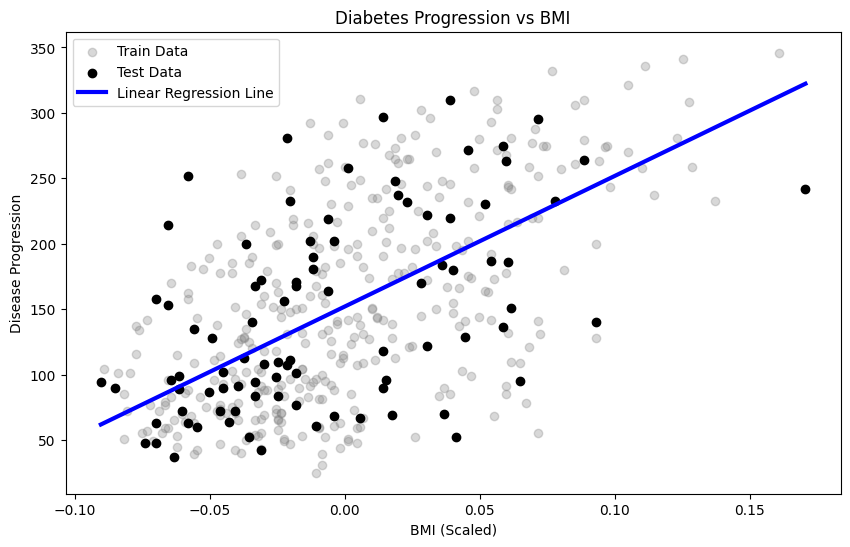

In [69]:
#do write code

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

x_bmi = diabetes.data[:, np.newaxis, 2]
y_target = diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x_bmi, y_target, test_size=0.2, random_state=42)

model_dia = LinearRegression()
model_dia.fit(x_train, y_train)

plt.figure(figsize=(10,6))

plt.scatter(x_train, y_train, color='gray', alpha=0.3, label='Train Data')
plt.scatter(x_test, y_test, color='black', label='Test Data')

line_x = np.linspace(x_bmi.min(), x_bmi.max(), 100).reshape(-1,1)
line_y = model_dia.predict(line_x)
plt.plot(line_x, line_y, color='blue', linewidth=3, label='Linear Regression Line')

plt.title('Diabetes Progression vs BMI')
plt.xlabel('BMI (Scaled)')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

## 2.6. \[예제 5\] 모델 성능 평가: 얼마나 잘 맞췄나? (MSE, R2)

모델을 만들었으면 점수를 매겨야 한다. 회귀 모델의 대표적인 성적표인
MSE와 R2 Score를 계산한다.

상황: 위에서 만든 당뇨병 예측 모델(BMI 기반)의 성적표 확인.

``` python
from sklearn.metrics import mean_squared_error, r2_score

# 1. 테스트 데이터에 대한 예측 수행
y_pred = model_dia.predict(X_test)

# 2. 성능 지표 계산
# MSE: 에러 제곱의 평균 (작을수록 좋음, 0이 완벽)
mse = mean_squared_error(y_test, y_pred)
# RMSE: MSE에 루트를 씌움 (원래 데이터와 단위가 같아져서 해석하기 좋음)
rmse = np.sqrt(mse)
# R2 Score: 설명력 (1에 가까울수록 모델이 데이터를 완벽하게 설명함)
r2 = r2_score(y_test, y_pred)

print("=== 모델 성적표 ===")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root MSE): {rmse:.2f}")
print(f"R2 Score (결정 계수): {r2:.2f}")

# 결과 해석
print("-" * 30)
print(f"해석 1: 이 모델은 예측할 때마다 평균적으로 약 {rmse:.2f} 정도 틀립니다.")
print(f"해석 2: BMI 변수 하나로는 전체 당뇨 진행도의 약 {r2*100:.1f}% 만 설명할 수 있습니다.")
print("       (현실의 질병은 복합적이므로 단일 변수로는 한계가 있음을 시사합니다.)")
```

> **📖 문제 풀이 가이드**
>
> 모델이 얼마나 잘 예측했는지 **채점**하는 단계입니다.
> - **주요 지표**:
>   - **MSE (Mean Squared Error)**: (정답 - 예측값)의 제곱의 평균. **작을수록 좋습니다.** (0이면 완벽)
>   - **R2 Score (결정 계수)**: 모델이 데이터를 얼마나 잘 설명하는지 비율로 나타냅니다. **1에 가까울수록 좋습니다.** (0.7 이상이면 꽤 괜찮음, 음수면 그냥 평균보다 못함)
> - **사용 함수**:
>   - `mean_squared_error(y_true, y_pred)`
>   - `r2_score(y_true, y_pred)`


In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. 테스트 데이터에 대한 예측 수행
y_pred = model_dia.predict(x_test)

# 2. 성능 지표 계산
# MSE: 에러 제곱의 평균 (작을수록 좋음, 0이 완벽)
mse = mean_squared_error(y_test, y_pred)
# RMSE: MSE에 루트를 씌움 (원래 데이터와 단위가 같아져서 해석하기 좋음)
rmse = np.sqrt(mse)
# R2 Score: 설명력 (1에 가까울수록 모델이 데이터를 완벽하게 설명함)
r2 = r2_score(y_test, y_pred)

print("=== 모델 성적표 ===")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root MSE): {rmse:.2f}")
print(f"R2 Score (결정 계수): {r2:.2f}")

# 결과 해석
print("-" * 30)
print(f"해석 1: 이 모델은 예측할 때마다 평균적으로 약 {rmse:.2f} 정도 틀립니다.")
print(f"해석 2: BMI 변수 하나로는 전체 당뇨 진행도의 약 {r2*100:.1f}% 만 설명할 수 있습니다.")
print("       (현실의 질병은 복합적이므로 단일 변수로는 한계가 있음을 시사합니다.)")

=== 모델 성적표 ===
MSE (Mean Squared Error): 4061.83
RMSE (Root MSE): 63.73
R2 Score (결정 계수): 0.23
------------------------------
해석 1: 이 모델은 예측할 때마다 평균적으로 약 63.73 정도 틀립니다.
해석 2: BMI 변수 하나로는 전체 당뇨 진행도의 약 23.3% 만 설명할 수 있습니다.
       (현실의 질병은 복합적이므로 단일 변수로는 한계가 있음을 시사합니다.)


In [72]:
#Do write code
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model_dia.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===모델 성적표===")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root MSE): {rmse:.2f}")
print(f"R2 Score (결정 계수): {r2:.2f}")

print("-" * 30)
print(f"해석 1: 이 모델은 예측할 때마다 평균적으로 약 {rmse:.2f} 정도 틀립니다.")
print(f"해석 2: BMI 변수 하나로는 전체 당뇨 진행도의 약 {r2*100:.1f}% 만 설명할 수 있습니다.")
print(".       (현실의 질병은 복합적이므로 단일 변수로는 한계가 있음을 시사합니다.)")


===모델 성적표===
MSE (Mean Squared Error): 4061.83
RMSE (Root MSE): 63.73
R2 Score (결정 계수): 0.23
------------------------------
해석 1: 이 모델은 예측할 때마다 평균적으로 약 63.73 정도 틀립니다.
해석 2: BMI 변수 하나로는 전체 당뇨 진행도의 약 23.3% 만 설명할 수 있습니다.
.       (현실의 질병은 복합적이므로 단일 변수로는 한계가 있음을 시사합니다.)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. 테스트 데이터에 대한 예측 수행
y_pred = model_dia.predict(X_test)

# 2. 성능 지표 계산
# MSE: 에러 제곱의 평균 (작을수록 좋음, 0이 완벽)
mse = mean_squared_error(y_test, y_pred)
# RMSE: MSE에 루트를 씌움 (원래 데이터와 단위가 같아져서 해석하기 좋음)
rmse = np.sqrt(mse)
# R2 Score: 설명력 (1에 가까울수록 모델이 데이터를 완벽하게 설명함)
r2 = r2_score(y_test, y_pred)

print("=== 모델 성적표 ===")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root MSE): {rmse:.2f}")
print(f"R2 Score (결정 계수): {r2:.2f}")

# 결과 해석
print("-" * 30)
print(f"해석 1: 이 모델은 예측할 때마다 평균적으로 약 {rmse:.2f} 정도 틀립니다.")
print(f"해석 2: BMI 변수 하나로는 전체 당뇨 진행도의 약 {r2*100:.1f}% 만 설명할 수 있습니다.")
print("       (현실의 질병은 복합적이므로 단일 변수로는 한계가 있음을 시사합니다.)")